- Default PSO parameters
- max_back=20

In [39]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import cnguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset

def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

def run_experiment(data_item, cost_function):
    results = []
    genes = []
    
    name, (x_train, y_train, x_test, y_test), params = data_item
    print(name)
    
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    prob = pg.problem(cost_function(x_train, y_train, params, bounds))
    
    pg.set_global_rng_seed(42)
    
    for i in range(100):
        print(i, end=',')
        algo = pg.algorithm(pg.pso(gen=5000))
        #algo.set_verbosity(0)
        pop = pg.population(prob, 20)
        pop = algo.evolve(pop)
        results.append(pop.champion_f[0])
        genes.append(pop.champion_x)
    
    return results, genes

In [40]:
import pygmo as pg

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):      
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        
        pred = individual.transform(self.X)
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return self.bounds

In [41]:
kw_params = {'real_valued': True, 'constants': 10, 'max_back': 10}

params_nguyen4 = tengp.Parameters(1, 1, 1, 25, cnguyen7_funset, **kw_params)
params_nguyen7 = tengp.Parameters(1, 1, 1, 50, cnguyen7_funset, **kw_params)
params_nguyen10 = tengp.Parameters(3, 1, 1, 50, cnguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(5, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

all_params = [params_nguyen7, params_pagie1, params_keijzer6, params_korns, params_vlad]

In [42]:
import random 

data = [
    ('nguyen4', symreg.get_benchmark_poly(random, 6), params_nguyen4),
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('nguyen10', symreg.get_benchmark_nguyen10(random, None), params_nguyen10),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

# Nguyen 4

In [33]:
%%time

ng4_res, ng4_genes = run_experiment(data[0], cost_function)

nguyen4
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:14: RuntimeWarning: invalid value encountered in sin
  return np.sin(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:111: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:109: RuntimeWarning: invalid value encountered in subtract
  l = (1-a)*f_l(L, U)


1,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)


2,3,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:107: RuntimeWarning: invalid value encountered in add
  U = (1-c)*x_l2 + c*x_u2


4,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:133: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


5,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:107: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


6,7,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:110: RuntimeWarning: invalid value encountered in subtract
  u = a*f_u(L, U)


8,9,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:109: RuntimeWarning: invalid value encountered in multiply
  l = (1-a)*f_l(L, U)


10,11,12,13,14,15,16,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:110: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)


17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in add
  L = (1-b)*x_l1 + b*x_u1


49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:109: RuntimeWarning: invalid value encountered in add
  l = (1-a)*f_l(L, U)


70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 2h 26min 36s, sys: 21.9 s, total: 2h 26min 58s
Wall time: 2h 33min 12s


In [35]:
import pickle

pickle.dump(ng4_res, open('ng4_res_100_000evals', 'wb'))
pickle.dump(ng4_genes, open('ng4_genes_100_000evals', 'wb'))

nguyen4
min: 6.977581511797936e-07
mean: 0.08803735579360877
median: 0.00011797483409456262
variance: 0.12085522367717737


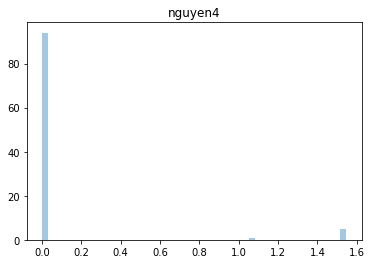

In [34]:
plot_results('nguyen4', ng4_res)

# Nguyen 7


In [ ]:
%%time

ng7_res, ng7_genes = run_experiment(data[1], cost_function)

In [ ]:
pickle.dump(ng7_res, open('ng7_res_100_000evals', 'wb'))
pickle.dump(ng7_genes, open('ng7_genes_100_000evals', 'wb'))

In [ ]:
plot_results('nguyen7', ng7_res)

# Nguyen 10

In [ ]:
%%time

ng10_res, ng10_genes = run_experiment(data[2], cost_function)

In [ ]:
pickle.dump(ng10_res, open('ng10_res_100_000evals', 'wb'))
pickle.dump(ng10_genes, open('ng10_genes_100_000evals', 'wb'))

In [ ]:
plot_results(data[2][0], ng10_res)

# Pagie

In [ ]:
%%time

pag1_res, pag1_genes = run_experiment(data[3], cost_function)

In [ ]:
pickle.dump(pag1_res, open('pag1_res_100_000evals', 'wb'))
pickle.dump(pag1_genes, open('pag1_genes_100_000evals', 'wb'))

In [ ]:
plot_results(data[3][0], pag1_res)

# Keijzer 6

In [ ]:
%%time

kei6_res, kei6_genes = run_experiment(data[4], cost_function)

pickle.dump(kei6_res, open('kei6_res_100_000evals', 'wb'))
pickle.dump(kei6_genes, open('kei6_genes_100_000evals', 'wb'))

plot_results(data[4][0], kei6_res)

# Korns 12

In [38]:
%%time

korns12_res, korns12_genes = run_experiment(data[5], cost_function)

pickle.dump(korns12_res, open('korns12_res_100_000evals', 'wb'))
pickle.dump(korns12_genes, open('korns12_genes_100_000evals', 'wb'))

korns12
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:17: RuntimeWarning: invalid value encountered in cos
  return np.cos(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:29: RuntimeWarning: invalid value encountered in tan
  return np.tan(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:110: RuntimeWarning: invalid value encountered in subtract
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:111: Runti

KeyboardInterrupt: 

In [ ]:
plot_results(data[5][0], korns12_res)

# Vladislasleva 4

In [ ]:
%%time

vlad4_res, vlad4_genes = run_experiment(data[6], cost_function)

pickle.dump(vlad4_res, open('vlad4_res_100_000evals', 'wb'))
pickle.dump(vlad4_genes, open('vlad4_genes_100_000evals', 'wb'))

In [ ]:
plot_results(data[6][0], vlad4_res)

# Rounding of results

In [ ]:
rounded_results = []

chunk = 100
for i, (name, (x_train, y_train, x_test, y_test), params) in zip(range(5), data):
    problem_results = []
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
        
    bounds = tengp.individual.IndividualBuilder(params).create().bounds
    
    print(name)
    
    for genes in champions[chunk*i:chunk*i + chunk]:
        
        individual = params.individual_class(np.round(genes), bounds, params)
        
        output = individual.transform(x_train)
        
        try:
            problem_results.append(mean_squared_error(output, y_train))
        except ValueError:
            print('value error')
    
    rounded_results.append(problem_results)
        
        

In [ ]:
np.min(rounded_results[4])